<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas-2022/blob/main/Ejemplos_Regresion_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('https://github.com/rpasquini/herramientas-econometricas/blob/main/datos/eah2016_individual.csv?raw=true')

In [ ]:
df=df.loc[df.aesc<20]

In [ ]:
df.groupby('m1')['logingreso','aesc'].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,logingreso,aesc
m1,,
0,2,2
5 País limítrofe,979,1225
99,2,2
Ciudad de Bs. As.,5191,8693
En otra provincia,1688,1899
Partido del GBA,874,1048
País no limítrofe,775,963
Prov. de Bs. As.,566,612
Prov. de Bs. As. s especif,7,8


In [8]:
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados


 # Ejemplo multivariado para ver cómo se relacionan las variables
Vamos a estimar:

$$logingreso_i=\beta_0+\beta_1 aesc_i+\epsilon_i$$

Luego evaluaremos agregar dummy inmigrante limitrofe

$$logingreso_i=\beta_0+\beta_1 aesc_i+\beta_1 dinmigrantelimit+\epsilon_i$$

In [ ]:
regress(['logingreso','aesc'], df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2507.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:36:00   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    301.990      0.0

In [ ]:
df['dinmigrantelimit']=0
df.loc[df.m1=='5 País limítrofe','dinmigrantelimit']=1

In [ ]:
regress(['logingreso','aesc','dinmigrantelimit'], df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1325.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:41:48   Log-Likelihood:                -11734.
No. Observations:               10084   AIC:                         2.347e+04
Df Residuals:                   10081   BIC:                         2.349e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.0732      0.028  

In [ ]:
df.m1.unique()

array(['Ciudad de Bs. As.', '5 País limítrofe', 'Partido del GBA',
       'En otra provincia', 'Prov. de Bs. As.', '99', 'País no limítrofe',
       'Prov. de Bs. As. s especif', 0], dtype=object)

In [ ]:
df[['aesc','dinmigrantelimit']].corr()

,aesc,dinmigrantelimit
aesc,1.000000,-0.046946
dinmigrantelimit,-0.046946,1.000000


In [ ]:
regress(['logingreso', 'dinmigrante'], df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           9.46e-43
Time:                        18:18:42   Log-Likelihood:                -12742.
No. Observations:               10111   AIC:                         2.549e+04
Df Residuals:                   10109   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.3516      0.010    947.430      

In [ ]:
regress(['logingreso', 'dmujer', 'aesc'], df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     528.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          4.58e-219
Time:                        18:16:07   Log-Likelihood:                -12335.
No. Observations:               10113   AIC:                         2.468e+04
Df Residuals:                   10110   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9839      0.021    427.290      0.0

# Ejemplo OVB


Modelo Verdadero
$y=\beta_0+\beta_1 x_1+\beta_2 x_2+\epsilon$

Modelo estimo
$y=\beta_0+\beta_1 x_1+\epsilon$

Mi objetivo es entender $\beta_1$

Tengo un problema si:

* $x_2$ explica $y$
* Si $x_1$ y $x_2$ estan relacionados
 

Caso variable irrelevante

Modelo Verdadero
$y=\beta_0+\beta_1 x_1+0  x_2+\epsilon$

Modelo estimo
$y=\beta_0+\beta_1 x_1+\beta_2 x_2+\epsilon$

Mi objetivo es entender $\beta_1$

No es grave. 
El costo es inflar el s.error



In [3]:
datosedu=pd.read_csv('https://raw.githubusercontent.com/rpasquini/urban-econometrics/master/data/estadistica-educativa.csv')

In [4]:
datosedu

,id,tipo_gestion,nivel_educ_madre,iecep,one_alto_cs_nat,one_bajo_cs_nat,one_medio_cs_nat,one_alto_cs_soc,one_bajo_cs_soc,one_medio_cs_soc,...,one_medio_mat,tasa_repeticion_2012,tasa_sobreedad_2012,tasa_sobreedad_avanzada_2012,promocionados_2011,salidos_sin_pase_2011,ive_2011,domiciliados_pba,extranjeros_2013,inversion_alumnos_2013
0,1,Privada,5.79,6.65855,0.290,0.097,0.613,0.519,0.037,0.444,...,0.615,16.509400,17.45280,2.358490,83.1818,1.293100,0.131480,0.0,5.172410,24340.9
1,2,Privada,6.25,6.43845,0.000,0.214,0.786,0.227,0.227,0.545,...,0.714,0.000000,60.14490,9.420290,61.7188,0.000000,0.076608,0.0,2.290080,26374.0
2,3,Privada,5.53,7.19646,0.300,0.025,0.675,0.561,0.073,0.366,...,0.561,2.061860,6.95876,2.061860,92.2078,2.784810,0.067712,0.0,4.639180,15561.5
3,4,Estatal,6.06,6.95247,0.265,0.229,0.506,0.463,0.053,0.484,...,0.671,3.278690,13.93440,1.311480,87.2659,1.654410,0.074672,3.5,5.871560,20568.4
4,5,Estatal,4.65,3.95331,0.054,0.518,0.429,0.182,0.109,0.709,...,0.547,21.496300,70.81140,44.362500,72.1358,20.140500,0.553109,17.4,10.756100,25034.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,Privada,5.79,3.64162,0.000,0.548,0.452,0.152,0.485,0.364,...,0.441,0.000000,13.10680,1.456310,92.4883,0.934579,0.027336,0.0,1.860470,23411.7
304,305,Estatal,4.83,5.92635,0.229,0.271,0.500,0.140,0.281,0.579,...,0.643,10.545100,41.28690,25.290400,70.7477,8.133560,0.226170,21.0,9.444990,34052.7
305,306,Estatal,4.83,5.36956,0.047,0.313,0.641,0.134,0.269,0.597,...,0.641,19.207300,48.62800,19.969500,62.8788,0.000000,0.255610,6.5,17.749600,21198.8
306,307,Privada,6.23,7.13024,0.214,0.143,0.643,0.345,0.172,0.483,...,0.333,0.966184,2.89855,0.483092,91.6667,0.460829,0.020934,0.0,0.483092,14344.5


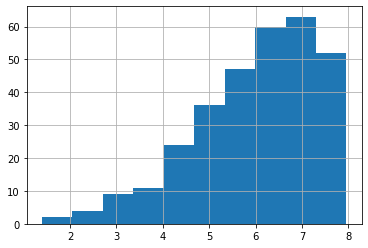

In [5]:
datosedu['iecep'].hist()

$iecep=\beta_0+\beta_1 dpublico+\epsilon$

In [6]:
datosedu['dpublico']=0
datosedu.loc[datosedu['tipo_gestion']=="Estatal",'dpublico']=1

In [7]:
datosedu[['tipo_gestion','dpublico']]

,tipo_gestion,dpublico
0,Privada,0
1,Privada,0
2,Privada,0
3,Estatal,1
4,Estatal,1
...,...,...
303,Privada,0
304,Estatal,1
305,Estatal,1
306,Privada,0


In [9]:
regress(['iecep','dpublico'],datosedu)

                            OLS Regression Results                            
Dep. Variable:                  iecep   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     77.79
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           8.89e-17
Time:                        13:39:33   Log-Likelihood:                -487.24
No. Observations:                 308   AIC:                             978.5
Df Residuals:                     306   BIC:                             985.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4499      0.085     75.682      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
regress(['iecep','dpublico','nivel_educ_madre'],datosedu)

                            OLS Regression Results                            
Dep. Variable:                  iecep   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           1.12e-41
Time:                        13:56:27   Log-Likelihood:                -426.90
No. Observations:                 308   AIC:                             859.8
Df Residuals:                     305   BIC:                             871.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7852      0.474  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
dummiesgestion=pd.get_dummies(datosedu.tipo_gestion)

In [ ]:
datosedu=pd.concat([ datosedu, dummiesgestion],axis=1)

In [ ]:
regress(['iecep', 'Privada'], datosedu)

                            OLS Regression Results                            
Dep. Variable:                  iecep   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     77.79
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           8.89e-17
Time:                        18:43:25   Log-Likelihood:                -487.24
No. Observations:                 308   AIC:                             978.5
Df Residuals:                     306   BIC:                             985.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2251      0.110     47.656      0.0

# Ejemplos Colinealidad


In [ ]:
df['aesc2']=df.aesc**2

In [ ]:
regress(['logingreso', 'aesc', 'aesc2'], df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     1398.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:44:40   Log-Likelihood:                -11676.
No. Observations:               10084   AIC:                         2.336e+04
Df Residuals:                   10081   BIC:                         2.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7384      0.057    152.174      0.0

In [ ]:
regress(['logingreso', 'aesc'], df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     2528.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:44:59   Log-Likelihood:                -11782.
No. Observations:               10084   AIC:                         2.357e+04
Df Residuals:                   10082   BIC:                         2.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9928      0.027    298.484      0.0

Ejemplo en datos de educacion


In [11]:
regress(['tasa_repeticion_2012', 'one_alto_mat'], datosedu)

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.177
Method:                   Least Squares   F-statistic:                     66.84
Date:                  Fri, 14 Oct 2022   Prob (F-statistic):           7.90e-15
Time:                          14:48:05   Log-Likelihood:                -1119.3
No. Observations:                   308   AIC:                             2243.
Df Residuals:                       306   BIC:                             2250.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.2180     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
regress(['tasa_repeticion_2012', 'one_alto_cs_nat'], datosedu)

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.177
Method:                   Least Squares   F-statistic:                     66.93
Date:                  Fri, 14 Oct 2022   Prob (F-statistic):           7.61e-15
Time:                          14:50:50   Log-Likelihood:                -1119.2
No. Observations:                   308   AIC:                             2242.
Df Residuals:                       306   BIC:                             2250.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
regress(['tasa_repeticion_2012', 'one_alto_cs_soc'], datosedu)

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.190
Model:                              OLS   Adj. R-squared:                  0.188
Method:                   Least Squares   F-statistic:                     71.94
Date:                  Thu, 02 Jul 2020   Prob (F-statistic):           9.62e-16
Time:                          20:48:21   Log-Likelihood:                -1117.2
No. Observations:                   308   AIC:                             2238.
Df Residuals:                       306   BIC:                             2246.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.

In [13]:
regress(['tasa_repeticion_2012',  'one_alto_mat', 'one_alto_cs_nat', 'one_alto_cs_soc'], datosedu)

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.228
Model:                              OLS   Adj. R-squared:                  0.220
Method:                   Least Squares   F-statistic:                     29.89
Date:                  Fri, 14 Oct 2022   Prob (F-statistic):           5.80e-17
Time:                          14:51:42   Log-Likelihood:                -1109.9
No. Observations:                   308   AIC:                             2228.
Df Residuals:                       304   BIC:                             2243.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
regress(['tasa_repeticion_2012',  'one_alto_mat', 'one_alto_cs_nat', 'one_alto_cs_soc', 'one_alto_lengua'], datosedu)

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.299
Model:                              OLS   Adj. R-squared:                  0.290
Method:                   Least Squares   F-statistic:                     32.38
Date:                  Fri, 14 Oct 2022   Prob (F-statistic):           1.78e-22
Time:                          14:56:49   Log-Likelihood:                -1094.9
No. Observations:                   308   AIC:                             2200.
Df Residuals:                       303   BIC:                             2218.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
